In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
from itertools import combinations

In [2]:
def processing_data(df, target):
    """
    remove the 2 first caracters of the column class and the last caracter
    the data of 'class' have the form : b'...' where ... are the response
    """
    df[target] = df[target].str[2:]
    df[target] = df[target].str[:-1]

    return df

In [3]:
raw_df = pd.read_csv("C:/Users/nasse/Desktop/GenieLogiciel/VC_prediction/data/raw/data.csv")

In [4]:
processing_data(raw_df, 'class')

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [5]:
raw_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [6]:
raw_df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [7]:
# store feature matrix in "X"
X = raw_df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']]

# store response vector in "y"
y = raw_df['class']

print(X.shape)
print(y.shape)

y.unique()

(310, 6)
(310,)


array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [8]:
for i in y.unique():
    print("classe : %s, nb exemplaires: %s" % (i, len(y[ y == i]) ) )

classe : Hernia, nb exemplaires: 60
classe : Spondylolisthesis, nb exemplaires: 150
classe : Normal, nb exemplaires: 100


In [9]:
def category_to_numeric(x):
    if x == "Hernia":
        return 0
    if x == "Normal":
        return 1
    if x == "Spondylolisthesis":
        return 2
    else:
        return x

In [10]:
Y = y.apply(category_to_numeric)

In [11]:
var = X.columns
liste_combinaison = combinations(var, 2)

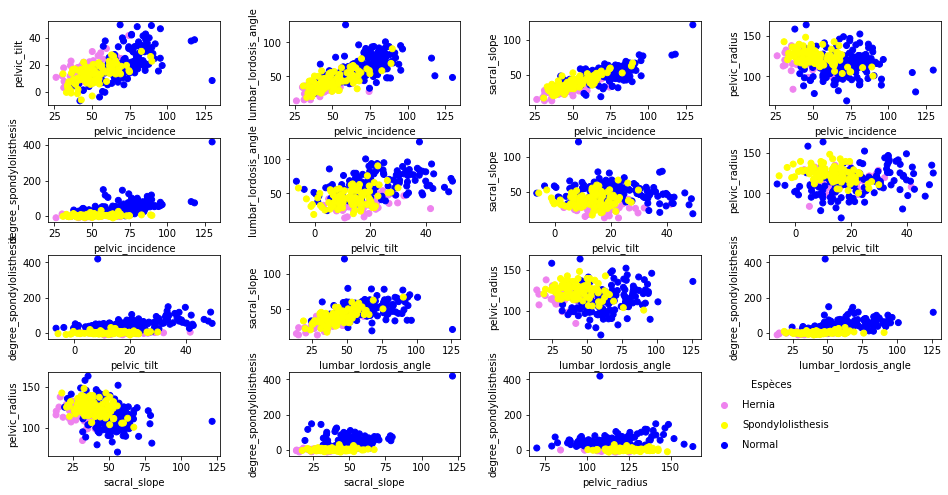

In [12]:
fig = plt.figure(figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


clist = ['violet', 'yellow', 'blue']
colors = [clist[c] for c in Y]
c=1
for i in list(liste_combinaison):
    plt.subplot(4,4,c).scatter(X[i[0]], X[i[1]], c=colors)
    plt.xlabel(i[0])
    plt.ylabel(i[1])
    c=c+1

# Légende
for ind, s in enumerate(y.unique()):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1
           , bbox_to_anchor=(1.8, .5) , loc="center right", title='Espèces')
plt.plot();


In [13]:
sns.set()
df = pd.DataFrame(X, columns=var)
df['target'] = Y
df['label'] = y
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,target,label
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0,Hernia


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


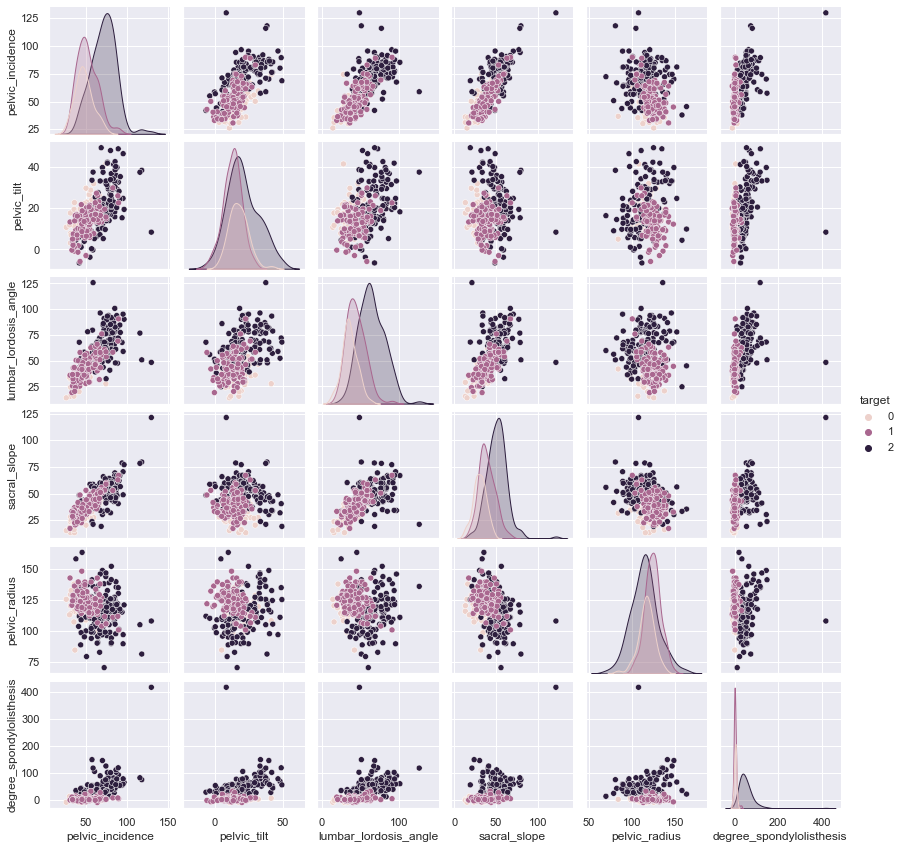

In [14]:
sns.pairplot(df, hue='target', vars=var, size=2)